In [1]:
from tifffile import imread
import os
from os.path import exists, join
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Parameters and path

In [2]:
um_per_pixel = 0.117
s_per_frame = 0.1
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/"

img_folder = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/Controls/condensation_fusion_timelapse/"
os.chdir(img_folder)
lst_imgs = [f for f in os.listdir(img_folder) if f.endswith(".tif")]

plow = 0.5  # imshow intensity percentile
phigh = 90
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

vmin = 700
vmax = 2000
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scale_bar_offset = 1

In [3]:
lst_imgs

['Substack (90).tif',
 'Substack (56).tif',
 'Substack (51).tif',
 'Substack (190).tif',
 'Substack (130).tif',
 'Substack (70).tif']

### First Frame, with scale bar

In [4]:
# # full size: 418x674
# zoom_in_x = (0, 418)
# zoom_in_y = (0, 674)
# scale_bar_offset = 10

# # Cropping
# ilastik_output = ilastik_output[
#     zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]
# ]
# img = img[zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]]

# mask_all_condensates = 2 - ilastik_output  # background label=2, condensate label=1
# # find contours coordinates in binary edge image. contours here is a list of np.arrays containing all coordinates of each individual edge/contour.
# contours, _ = cv2.findContours(
#     mask_all_condensates, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
# )


# plt.figure(dpi=300)
# # Contrast stretching
# vmin, vmax = np.percentile(img, (plow, phigh))
# plt.imshow(img, cmap="Blues", vmin=vmin, vmax=vmax)
# for cnt in contours:
#     x = cnt[:, 0][:, 0]
#     y = cnt[:, 0][:, 1]
#     plt.plot(x, y, "-", color=line_color, linewidth=2, alpha=0.7)
#     # still the last closing line will be missing, get it below
#     xlast = [x[-1], x[0]]
#     ylast = [y[-1], y[0]]
#     plt.plot(xlast, ylast, "-", color=line_color, linewidth=2, alpha=0.7)
# plt.xlim(0, img.shape[0])
# plt.ylim(0, img.shape[1])
# plt.plot(
#     [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
#     [scale_bar_offset, scale_bar_offset],
#     "-",
#     color=scalebar_color,
#     lw=7,
# )
# plt.axis("scaled")
# plt.show()

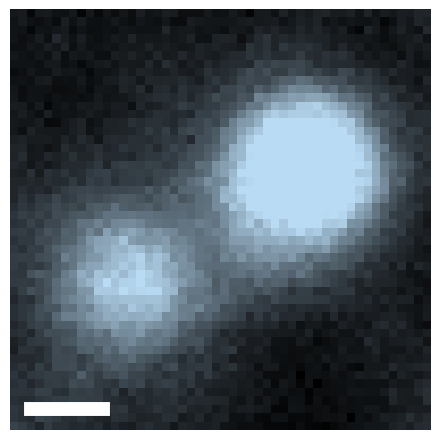

In [5]:
fname = "Substack (51).tif"
raw_img = imread(fname)
img_toplot = raw_img[10:60, 5:55]
time_s = (int(fname.split("(")[-1].split(")")[0]) - 51) * s_per_frame

plt.figure()
plt.imshow(img_toplot, cmap=cmap, vmin=vmin, vmax=vmax)
# plt.text(
#     0,
#     10,
#     str(round(time_s, 2)) + " s",
#     fontsize=80,
#     color="white",
# )
plt.xlim(0, img_toplot.shape[0])
plt.ylim(0, img_toplot.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")

# plot scale bar
plt.plot(
    [
        2,
        2 + scalebar_length_pxl,
    ],
    [47, 47],
    "-",
    color=scalebar_color,
    lw=10,
)

plt.savefig(
    join(folder_save, "Fusion_timelapse-start.png"),
    format="png",
    bbox_inches="tight",
    dpi=300,
    transparent=True,
)

plt.show()

### Other Frames, no scale bar

In [6]:
for fname in lst_imgs:
    raw_img = imread(fname)
    img_toplot = raw_img[10:60, 5:55]
    time_s = (int(fname.split("(")[-1].split(")")[0]) - 51) * s_per_frame

    plt.figure()
    plt.imshow(img_toplot, cmap=cmap, vmin=vmin, vmax=vmax)
    # plt.text(
    #     0,
    #     10,
    #     str(round(time_s, 2)) + " s",
    #     fontsize=80,
    #     color="white",
    # )
    plt.xlim(0, img_toplot.shape[0])
    plt.ylim(0, img_toplot.shape[1])
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.axis("scaled")
    plt.axis("off")

    plt.savefig(
        join(folder_save, "Fusion_timelapse-" + str(round(time_s, 2)) + ".png"),
        format="png",
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )
    plt.close()